<a href="https://colab.research.google.com/github/Tayfungit/DL/blob/main/DL_Assignment_2_(Image_Classification_with_CNN)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [6]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
print("There are ", len(X_train), "images in the training dataset")
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [8]:
# Checking the shape of one image 
X_train[5].shape

(28, 28)

In [9]:
X_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

(<matplotlib.image.AxesImage at 0x7f298230dd90>,
 <matplotlib.image.AxesImage at 0x7f29822cbdd0>)

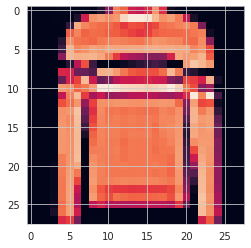

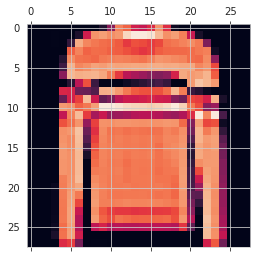

In [12]:
plt.imshow(X_train[5]), plt.matshow(X_train[5])

In [23]:
y_train[0] # Label'i 9

9

In [17]:
y_train.shape

(60000,)

In [18]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [21]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [24]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [27]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [25]:
y_train[0] # Label'i 9.

9

In [34]:
classes[y_train[0]] # Label'i 9 olan datanin Class'i 'Ankle boot'.

'Ankle boot'

In [35]:
classes[int(y_train[0])] # Label'i 9 olan datanin Class'i 'Ankle boot'. 

'Ankle boot'

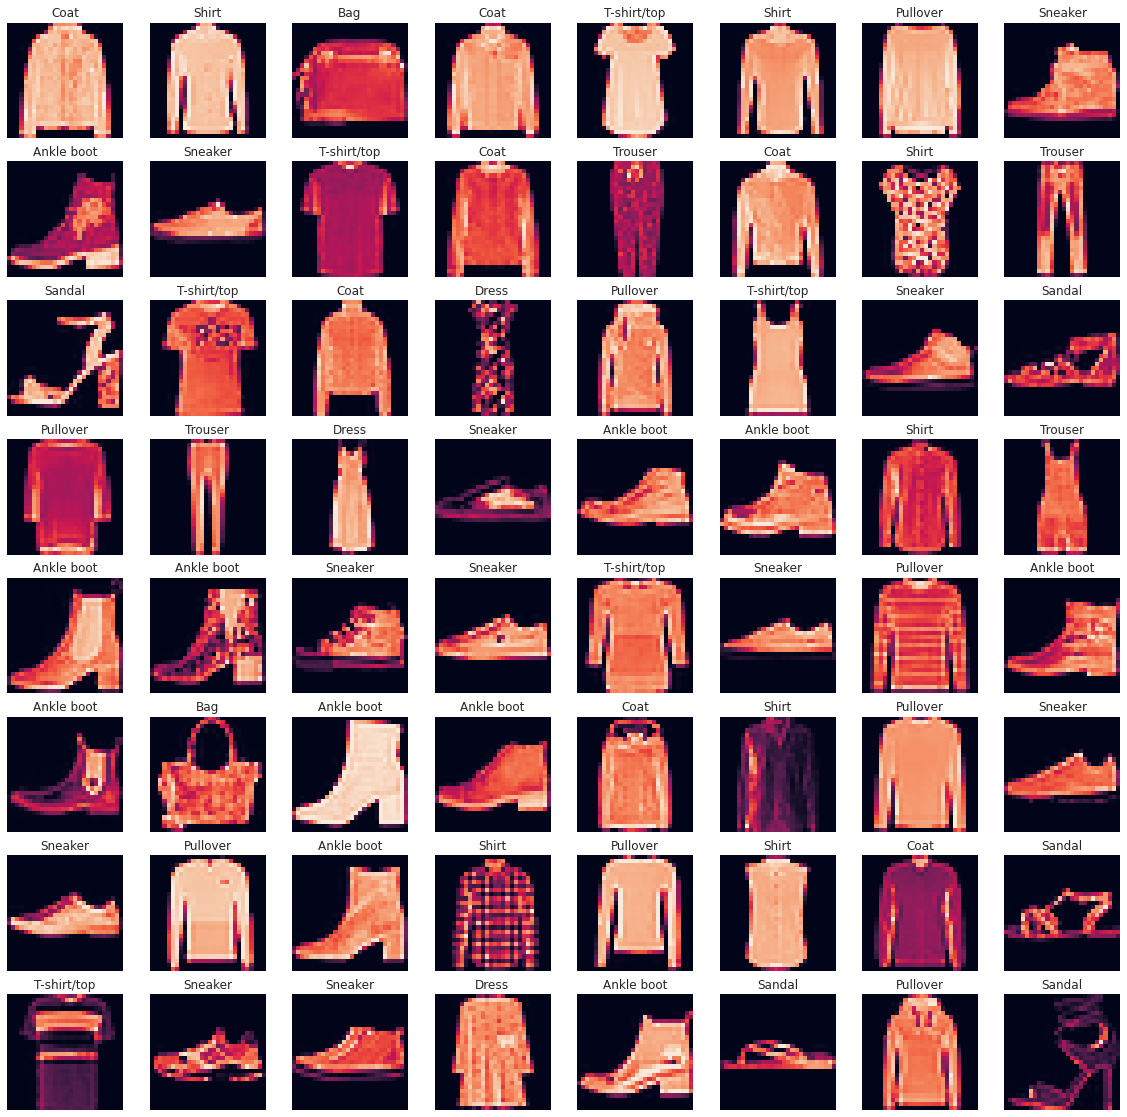

In [36]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=60000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

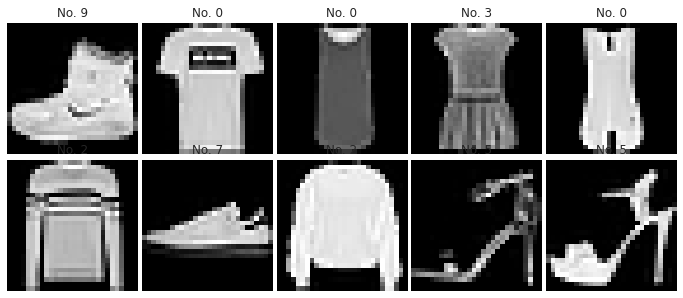

In [37]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        ax[r,c].imshow( X_train[image_index], cmap='gray')   # rengi gray yazinda siyah beyaz getirmis oldu. 
        
plt.tight_layout()
plt.show()
plt.close()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [43]:
X_train[0].min(), X_train[0].max()

(0.0, 1.0)

In [41]:
# Normalize image pixels. 
# Bütün degerleri 255 bölüyoruz. 
# Resimleri böyle scale edebiliriz. 
# Araligi kücültüyoruz ki islem hacmi azalsin.

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [44]:
X_train[0].min(), X_train[0].max()

(0.0, 1.0)

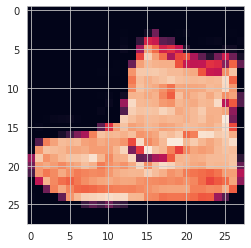

In [45]:
plt.imshow(X_train[0])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [46]:
X_train.shape, X_test.shape  # resim S/B oldugu icin sag yaninda 1 yazmali ama vermedi. Manuel olarak yazacagiz.

((60000, 28, 28), (10000, 28, 28))

In [47]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [48]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [49]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [51]:
y_train, y_train.shape

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8), (60000,))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [52]:
from tensorflow.keras.utils import to_categorical   

# Bu fonksiyonun icine y_test ve y_train koyacagiz ve datamizi yeniden boyutlandiracagiz.
# Böylece one-hot-encoding(yani dummies) yapacagiz.

In [53]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [55]:
y_train[0], Y_train[0] 

## Modelim 9. indexi 1'e, digerlerini 0'a yaklastirmaya calisacak

(9, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32))

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [62]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same')) # padding=same demekle boyutlari degismez ayni kalir. Yani tüm pixellerin agirliklarinin esit alinmasi saglanir.

model.add(MaxPool2D(pool_size=(2, 2))) #(2x2 pooling verdik dolayisiyla boyutu yariya düsürecek. 3x3 olsaydi 3'e bölecekti. Eger bölünemeyen sayisi ise artan deger kadar resimlerimiz bilgisinde azalma olacaktir.)

model.add(Flatten())   # Veri burada düzlesir, yani Array haline gelir.


model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Datanin sayisini artirmak yada resimin kalitesini artirmak tahmin degerimizi yükseltir.
# Resimler cerceve kenarlarina degiyor. Kenarlardan kayip yasamamak icin 'pading same' kullanilir.

In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 28)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5488)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               702592    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 704,162
Trainable params: 704,162
Non-trainable params: 0
________________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [67]:
from tensorflow.keras.callbacks import EarlyStopping

In [69]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [70]:
model.fit(X_train, Y_train, batch_size=28, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/10
2143/2143 [==============================] - 20s 4ms/step - loss: 0.3927 - accuracy: 0.8611 - val_loss: 0.3090 - val_accuracy: 0.8879
Epoch 2/10
2143/2143 [==============================] - 9s 4ms/step - loss: 0.2631 - accuracy: 0.9052 - val_loss: 0.2799 - val_accuracy: 0.9009
Epoch 3/10
2143/2143 [==============================] - 9s 4ms/step - loss: 0.2277 - accuracy: 0.9189 - val_loss: 0.2787 - val_accuracy: 0.9059
Epoch 4/10
2143/2143 [==============================] - 9s 4ms/step - loss: 0.2081 - accuracy: 0.9267 - val_loss: 0.2757 - val_accuracy: 0.9062
Epoch 5/10
2143/2143 [==============================] - 9s 4ms/step - loss: 0.1918 - accuracy: 0.9327 - val_loss: 0.2760 - val_accuracy: 0.9102
Epoch 6/10
2143/2143 [==============================] - 9s 4ms/step - loss: 0.1815 - accuracy: 0.9367 - val_loss: 0.3133 - val_accuracy: 0.9048


**TASK 7: Plot values of metrics you used in your model.**

In [71]:
model.metrics_names

['loss', 'accuracy']

In [72]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.393,0.861,0.309,0.888
1,0.263,0.905,0.280,0.901
2,0.228,0.919,0.279,0.906
3,0.208,0.927,0.276,0.906
4,0.192,0.933,0.276,0.910


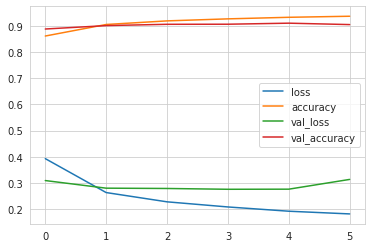

In [73]:
summary.plot();

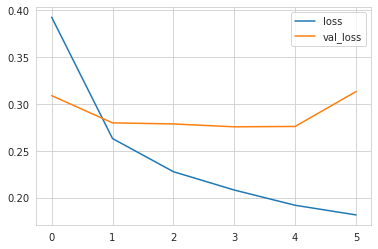

In [74]:
summary[["loss", "val_loss"]].plot();   

# CNN in en büyük dezavantaji hemen overfite gitmesidir. Bunu engellemek icin cok veri olmasi daha iyidir.
# Burada hemen overfite gittigi görünüyor.

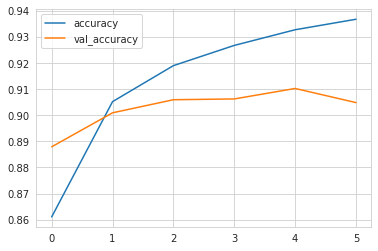

In [75]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [76]:
from sklearn.metrics import classification_report, confusion_matrix

In [77]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2757 - accuracy: 0.9062


[0.275650292634964, 0.9061999917030334]

In [78]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.275650292634964
Test accuracy: 0.9061999917030334


In [79]:
pred_prob = model.predict(X_test)
pred_prob

# Her bir satirdaki olasiliklarin deger toplami 1 dir. Softmax kullandigimiz icin.

array([[3.46184414e-08, 2.33501285e-09, 1.12788962e-06, ...,
        9.42090177e-04, 7.99152247e-07, 9.98991072e-01],
       [1.78658615e-06, 1.63624690e-16, 9.99981642e-01, ...,
        4.08982258e-11, 6.89606566e-11, 2.75790377e-13],
       [2.28421904e-09, 1.00000000e+00, 1.56126024e-12, ...,
        9.01103924e-18, 4.62182430e-13, 2.89769257e-16],
       ...,
       [1.23939674e-06, 2.02797967e-14, 7.45326815e-07, ...,
        2.81021943e-08, 9.99954820e-01, 1.17605699e-11],
       [4.52166882e-09, 9.99999285e-01, 2.96931299e-11, ...,
        2.18498806e-14, 7.35580607e-12, 1.67818832e-11],
       [2.58822623e-03, 8.44123642e-05, 2.86313402e-03, ...,
        1.08337745e-01, 6.39376976e-03, 1.62431616e-02]], dtype=float32)

In [80]:
pred_prob.shape

(10000, 10)

In [81]:
y_pred = np.argmax(pred_prob, axis=1)  # Hangisinin olmasi olasiligi yüksekse onun index numarasini verir.

In [82]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [83]:
pred_prob[0]

array([3.4618441e-08, 2.3350128e-09, 1.1278896e-06, 7.2016944e-09,
       3.8921095e-07, 6.3953652e-05, 4.2797981e-07, 9.4209018e-04,
       7.9915225e-07, 9.9899107e-01], dtype=float32)

In [84]:
np.argmax(pred_prob[0])  # En büyük olasilik 9'a ait oldugu icin onu döndürür. Asagida bunu bütün satirlar icin yapacagiz.

9

In [85]:
print(classification_report(y_test, y_pred))  # Tüm gözlemlere ait bilme durumlari burada görünüyor.

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       0.98      0.98      0.98      1000
           2       0.87      0.83      0.85      1000
           3       0.91      0.90      0.90      1000
           4       0.81      0.89      0.85      1000
           5       0.97      0.98      0.97      1000
           6       0.75      0.72      0.73      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [86]:
print(confusion_matrix(y_test, y_pred))

[[858   1  10  22   6   2  92   0   9   0]
 [  2 979   1   9   3   0   4   0   2   0]
 [ 15   2 831   8  77   1  66   0   0   0]
 [ 13   8  12 901  38   0  28   0   0   0]
 [  0   1  42  21 891   2  43   0   0   0]
 [  0   0   0   0   0 981   0  15   0   4]
 [112   2  53  30  79   0 717   0   7   0]
 [  0   0   0   0   0  14   0 958   1  27]
 [  3   2   1   3   2   4   3   2 980   0]
 [  0   0   0   0   0   9   1  24   0 966]]


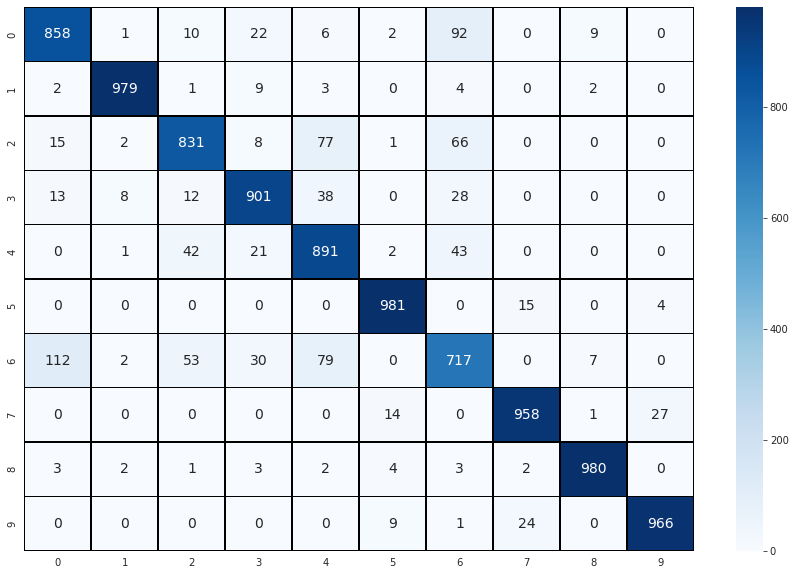

In [87]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

In [88]:
(y_test != y_pred).sum() # Toplam hatali sonuc sayisi

938

## Prediction

In [89]:
my_number = X_test[3]  # 3 nolu resmi test icin aldim.

In [90]:
my_number.shape 

# Test datasindaki bazi resimlerin datasi boyutlandirilmis
#(Yani S/B icin yazilan 1 otomatik gelmis)

(28, 28, 1)

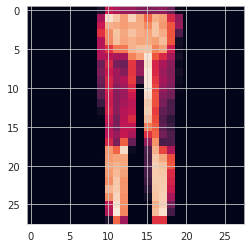

In [91]:
plt.imshow(my_number.reshape(28,28));

In [92]:
pred_prob = model.predict(my_number.reshape(1,28,28,1))  # Bir prediction yapilacakken resim sayisini manuel olarak yaziyoruz. Yani en basina 1 yaziyorum.! resim var.
pred_prob

# Disaridan bir resim test icin girilirken muhakkak modele uygun hale getirmeliyiz.

array([[2.5851967e-09, 1.0000000e+00, 2.0186961e-11, 3.8971312e-08,
        2.1632793e-08, 3.8968108e-12, 2.7100472e-10, 5.6974833e-15,
        6.6744986e-12, 3.0324541e-13]], dtype=float32)

In [93]:
# SHAPE --> (num_images,width,height,color_channels)
y_pred = np.argmax(pred_prob)
y_pred

# Sonucu 1 olarak buldu.

1

In [94]:
model.save("cnn-1.h5")

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___